In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
pip install pandas

In [5]:
pip install numpy

In [6]:
pip install matplotlib

In [7]:
pip install seaborn

In [8]:
pip install sklearn2

     |████████████████████████████████| 81kB 3.1MB/s 


In [9]:
pip install nltk

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
pip install imblearn

In [13]:
import pandas as dt
import numpy as nm
import matplotlib.pyplot as mpl
import seaborn as sb
import re
import string
import time
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from nltk.stem import PorterStemmer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [63]:
import pandas as dt
data = dt.read_csv("gdrive/MyDrive/NLP_Dataset Sentiment Analysis/Womens Clothing E-Commerce Reviews.csv")
data.tail()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
23485,23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


In [64]:
data = data[['Review Text', 'Rating']]
data.tail()

,Review Text,Rating
23481,I was very happy to snag this dress at such a ...,5
23482,"It reminds me of maternity clothes. soft, stre...",3
23483,"This fit well, but the top was very see throug...",3
23484,I bought this dress for a wedding i have this ...,3
23485,This dress in a lovely platinum is feminine an...,5


In [65]:
data.isna().mean()

Review Text    0.035979
Rating         0.000000
dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


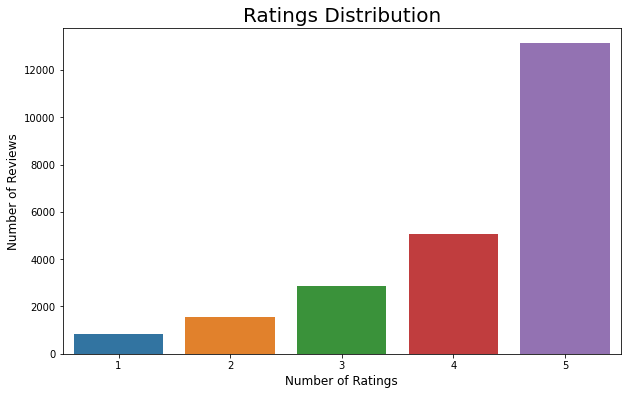

In [66]:
stars_count = data['Rating'].value_counts()
stars_count = stars_count.sort_index()

fig = mpl.figure(figsize=(10, 6))
ax = sb.barplot(stars_count.index, stars_count.values)
mpl.title("Ratings Distribution",fontsize = 20)
mpl.ylabel('Number of Reviews', fontsize = 12)
mpl.xlabel('Number of Ratings', fontsize = 12);

In [67]:
data=data[data.Rating != 3]

dt.set_option('mode.chained_assignment', None)
data["labels"] = data["Rating"].apply(lambda x: 1 if x < 3  else 0) # positive as 0 and negative as 1
data = data.drop("Rating",axis=1)

data.tail()

,Review Text,labels
23478,I was surprised at the positive reviews for th...,1
23479,So i wasn't sure about ordering this skirt bec...,0
23480,NaN,0
23481,I was very happy to snag this dress at such a ...,0
23485,This dress in a lovely platinum is feminine an...,0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


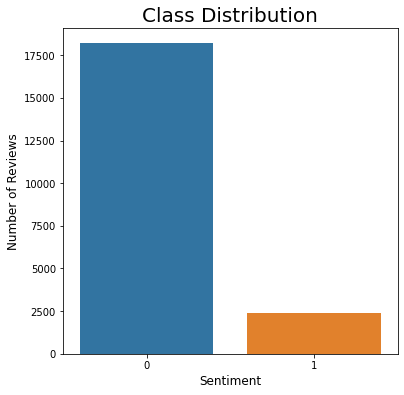

In [68]:
label_count = data['labels'].value_counts()
label_count = label_count.sort_index()

fig = mpl.figure(figsize=(6, 6))
ax = sb.barplot(label_count.index, label_count.values)
mpl.title("Class Distribution",fontsize = 20)
mpl.ylabel('Number of Reviews', fontsize = 12)
mpl.xlabel('Sentiment', fontsize = 12);

In [69]:
print("{:.2f}".format(data[data.labels == 0].shape[0]/data.shape[0]))

0.88


In [70]:
train, test = train_test_split(data, test_size = 0.3, stratify = data['labels'], random_state = 42)

In [71]:
punct = set(string.punctuation)

In [73]:
def text_prep(Review_Text):
    #clean text
    Review_Text = re.sub(r"n't", " not ", Review_Text)
    Review_Text = re.sub(r"\'s", " ", Review_Text)
    Review_Text = re.sub(r"\'ve", " have ", Review_Text)
    Review_Text = re.sub(r"\'re", " are ", Review_Text)
    Review_Text = re.sub(r"\'d", " would ", Review_Text)
    Review_Text = re.sub(r"\'ll", " will ", Review_Text)
    
    #remove non-letters and lower case
    Review_Text = re.sub('[^a-z\s]', '', Review_Text.lower())
    
    #remove punctuation        
    punc_removed = [char for char in Review_Text if char not in punct]
    punc_removed = ''.join(punc_removed)
    
    return [word for word in punc_removed.split()]

In [74]:
start_time = time.time()
cv= CountVectorizer(binary=True, analyzer = text_prep, min_df = 10, max_df = 0.95)
cv.fit_transform(train['Review Text'].values.astype('U'))
train_feature_set=cv.transform(train['Review Text'].values.astype('U'))
test_feature_set=cv.transform(test['Review Text'].values.astype('U'))
print("Time takes to convert text input into feature vector: ", round((time.time() - start_time)/60, 2), " mins")

Time takes to convert text input into feature vector:  0.05  mins


In [75]:
train_feature_set.shape[1]

2645

In [76]:
cv.vocabulary_['love']

1292

In [77]:
list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(1000)]

'hd'

In [78]:
y_train = train['labels'].values
y_test = test['labels'].values

In [79]:
start_time = time.time()
lr = LogisticRegression(solver = 'liblinear', random_state = 42, max_iter=1000)
lr.fit(train_feature_set,y_train)
y_pred = lr.predict(test_feature_set)
print("Time takes to train model and make predictions: ", round((time.time() - start_time)/60, 2), " mins")

Time takes to train model and make predictions:  0.01  mins


In [80]:
print("Accuracy: ",round(metrics.accuracy_score(y_test,y_pred),3))
print("F1: ",round(metrics.f1_score(y_test, y_pred),3))

Accuracy:  0.928
F1:  0.668


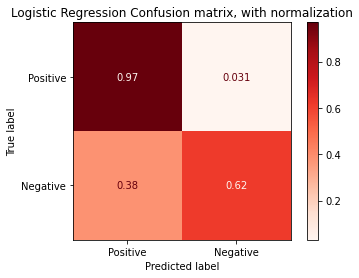

In [82]:
disp = metrics.plot_confusion_matrix(lr, test_feature_set, y_test,
                                 display_labels=['Positive', 'Negative'],
                                 cmap=mpl.cm.Reds,
                                 normalize='true')
disp.ax_.set_title('Logistic Regression Confusion matrix, with normalization');